# Discriminantes lineales 

- Función discriminante
- Máquinas de soporte vectorial
- Regresión logística


In [5]:
# Dependencias
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

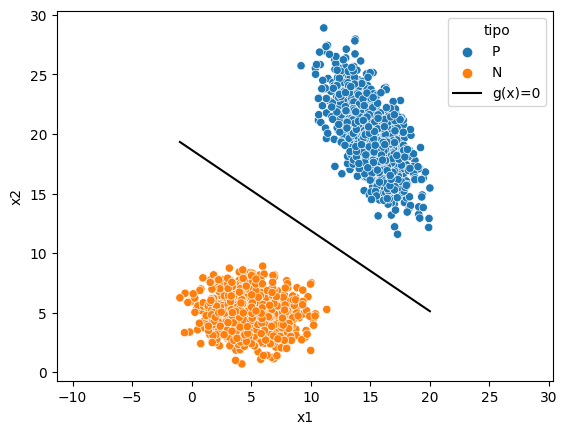

In [18]:
# Clasificación binaria (función discriminante)
X_1 = multivariate_normal(mean=[15, 20],
                          seed=0,
                          cov=[[3, -3], [-3, 8]]).rvs(1000)
X_2 = multivariate_normal(mean=[5, 5],
                          seed=0,
                          cov=[[4, 0], [0, 2]]).rvs(1000)
T = np.concatenate((X_1, X_2))
y_t = np.array(['P'] * X_1.shape[0] + ['N'] * X_2.shape[0])
linear = LinearSVC(dual=False).fit(T, y_t)
w_1, w_2 = linear.coef_[0]
w_0 = linear.intercept_[0]
g_0 = [dict(x1=x, x2=y, tipo='g(x)=0')
       for x, y in zip(T[:, 0], (-w_0 - w_1 * T[:, 0]) / w_2)] # función de discriminación lineal
df = pd.DataFrame(g_0 + \
                  [dict(x1=x, x2=y, clase='P') for x, y in X_1] + \
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2]
                 )
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax, hue='tipo', palette=['k'], legend=True)
_ = ax.axis('equal')

plt.savefig("discriminante1.jpg")

In [19]:
print(w_1, w_2, w_0)

0.09804658102989058 0.1448017883523195 -2.702271283322677


In [20]:
len(T[:,0])

2000

In [21]:
g_0[:3]

[{'x1': 13.162979305522613, 'x2': 9.74909344913742, 'tipo': 'g(x)=0'},
 {'x1': 16.289673830884684, 'x2': 7.631980728190028, 'tipo': 'g(x)=0'},
 {'x1': 11.453030897042783, 'x2': 10.906914751599702, 'tipo': 'g(x)=0'}]

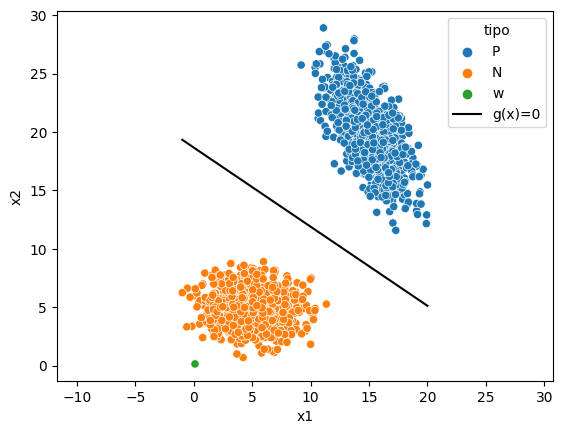

In [22]:
# Geometría de la función de decisión:

_ = pd.DataFrame([dict(x1=w_1, x2=w_2, clase='w')])
df = pd.concat((df, _), axis=0)
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax, hue='tipo', palette=['k'], legend=True)
_ = ax.axis('equal')

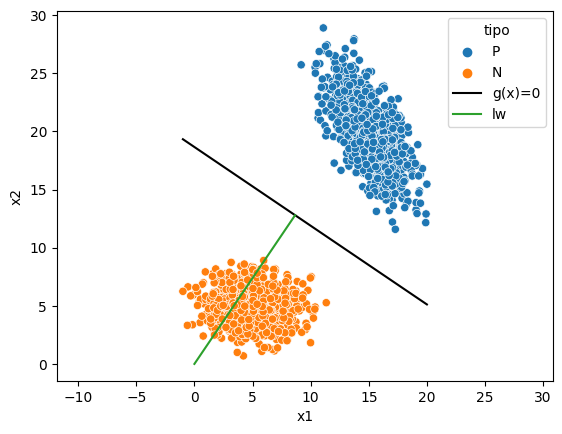

In [32]:
w = np.array([w_1, w_2]) / np.linalg.norm([w_1, w_2]) # vector unitario
len_0 = w_0 / np.linalg.norm([w_1, w_2]) # distancia y lado donde se encuentra
# el orgien con respecto a g(x) = 0 
df = pd.DataFrame(g_0 + \
                  [dict(x1=x, x2=y, clase='P') for x, y in X_1] + \
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2] + \
                  [dict(x1=0, x2=0, tipo='lw'),
                   dict(x1=-w[0]*len_0, x2=-w[1]*len_0, tipo='lw')]
                 )
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax, hue='tipo',
             palette=['k'] + sns.color_palette()[2:3],
             legend=True)
_ = ax.axis('equal')
plt.savefig('distancia2.png')

In [24]:
np.linalg.norm([w_1, w_2])

0.17487335406425084

In [25]:
np.array([w_1, w_2])

array([0.09804658, 0.14480179])

In [26]:
np.array([w_1, w_2])/np.linalg.norm([w_1, w_2])



array([0.56067193, 0.82803803])

In [27]:
len_0 = w_0 / np.linalg.norm([w_1, w_2])
len_0

-15.452733195303304

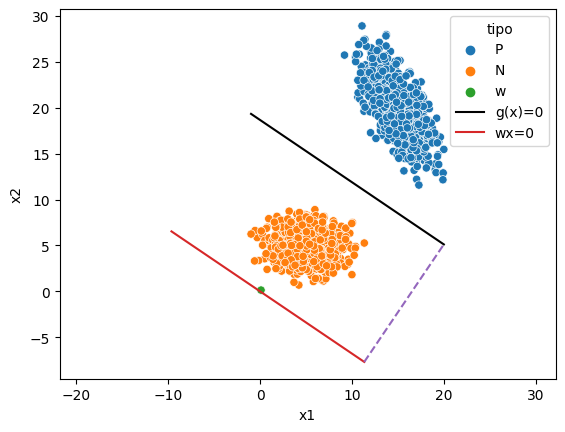

In [35]:
vec = np.array([1, (- w_1 * 1) / w_2])
x_max = T[:, 0].max()
length = np.linalg.norm(np.array([x_max, (-w_0 - w_1 * x_max) / w_2]) -
                        np.array([-w[0]*len_0, -w[1]*len_0]))
vec_der = length * vec / np.linalg.norm(vec)
x_min = T[:, 0].min()
length = np.linalg.norm(np.array([x_min, (-w_0 - w_1 * x_min) / w_2]) -
                        np.array([-w[0]*len_0, -w[1]*len_0]))
vec_izq = -length * vec / np.linalg.norm(vec)

g = [dict(x1=x, x2=(- w_1 * x) / w_2, tipo='wx=0')
     for x in np.linspace(vec_izq[0], vec_der[0])]
df = pd.DataFrame([dict(x1=x, x2=y, clase='P') for x, y in X_1] + \
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2] +\
                  [dict(x1=w_1, x2=w_2, clase='w')] +\
                  g_0 + g)
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax, hue='tipo',
             palette=['k'] + sns.color_palette()[3:4],
             legend=True)
ax.plot([vec_der[0], x_max], [vec_der[1], (-w_0 - w_1 * x_max) / w_2], '--',
        color=sns.color_palette()[4])
_ = ax.axis('equal')

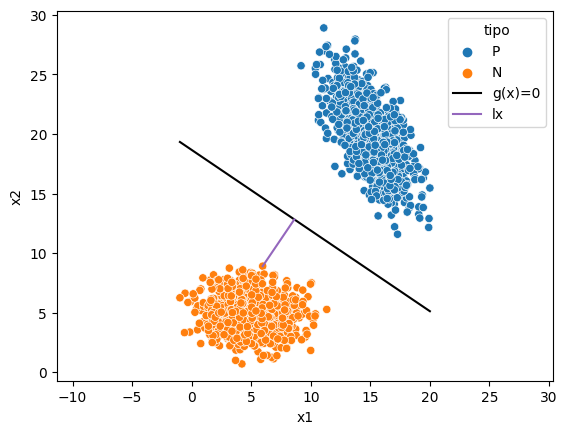

In [36]:
point = X_2[X_2.argmax(axis=0)[1]] # el punto máximo en la colección X2 con base en
# el valor del índice
point_g = vec *  np.dot(point, vec) / np.dot(vec, vec) - len_0 * w
df = pd.DataFrame(g_0 + \
                  [dict(x1=x, x2=y, clase='P') for x, y in X_1] +\
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2] +\
                  [dict(x1=point_g[0], x2=point_g[1], tipo='lx')] +\
                  [dict(x1=point[0], x2=point[1], tipo='lx')]                  
                 )
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax,
             hue='tipo',palette=['k'] + sns.color_palette()[4:5], legend=True)
_ = ax.axis('equal')
plt.savefig("distance.jpg")

In [29]:
point = X_2[X_2.argmax(axis=0)[1]]
point

array([5.96223025, 8.90231743])

In [34]:
X_2.argmax(axis=0)[1]

471

In [31]:
vec

NameError: name 'vec' is not defined

In [38]:
point

array([5.96223025, 8.90231743])

In [39]:
point_g

array([ 8.61892969, 12.82590993])

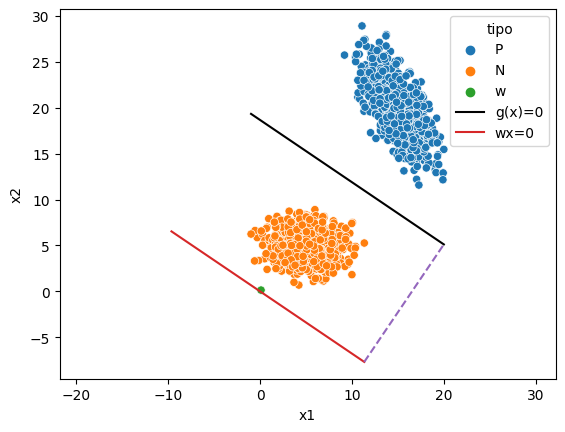

In [5]:
# El desplazamiento es igual a w0

vec = np.array([1, (- w_1 * 1) / w_2])
x_max = T[:, 0].max()
length = np.linalg.norm(np.array([x_max, (-w_0 - w_1 * x_max) / w_2]) -
                        np.array([-w[0]*len_0, -w[1]*len_0]))
vec_der = length * vec / np.linalg.norm(vec)
x_min = T[:, 0].min()
length = np.linalg.norm(np.array([x_min, (-w_0 - w_1 * x_min) / w_2]) -
                        np.array([-w[0]*len_0, -w[1]*len_0]))
vec_izq = -length * vec / np.linalg.norm(vec)

g = [dict(x1=x, x2=(- w_1 * x) / w_2, tipo='wx=0')
     for x in np.linspace(vec_izq[0], vec_der[0])]
df = pd.DataFrame([dict(x1=x, x2=y, clase='P') for x, y in X_1] + \
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2] +\
                  [dict(x1=w_1, x2=w_2, clase='w')] +\
                  g_0 + g)
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax, hue='tipo',
             palette=['k'] + sns.color_palette()[3:4],
             legend=True)
ax.plot([vec_der[0], x_max], [vec_der[1], (-w_0 - w_1 * x_max) / w_2], '--',
        color=sns.color_palette()[4])
_ = ax.axis('equal')

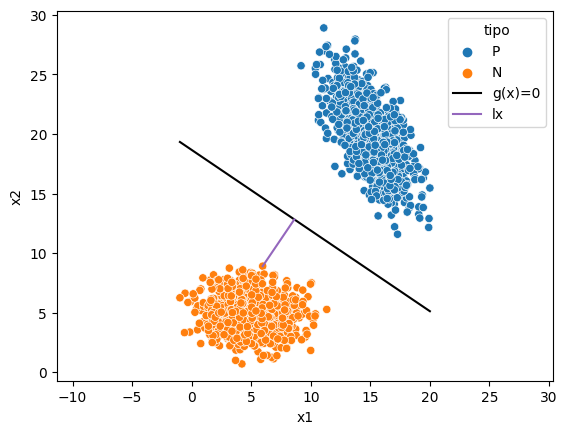

In [6]:
# the distance in one point
point = X_2[X_2.argmax(axis=0)[1]]
point_g = vec *  np.dot(point, vec) / np.dot(vec, vec) - len_0 * w
df = pd.DataFrame(g_0 + \
                  [dict(x1=x, x2=y, clase='P') for x, y in X_1] +\
                  [dict(x1=x, x2=y, clase='N') for x, y in X_2] +\
                  [dict(x1=point_g[0], x2=point_g[1], tipo='lx')] +\
                  [dict(x1=point[0], x2=point[1], tipo='lx')]                  
                 )
ax = sns.scatterplot(data=df, x='x1', y='x2', hue='clase', legend=True)
sns.lineplot(data=df, x='x1', y='x2', ax=ax,
             hue='tipo',palette=['k'] + sns.color_palette()[4:5], legend=True)
_ = ax.axis('equal')

In [43]:
vec

array([ 1.        , -0.67710891])

In [44]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
svm = LinearSVC(dual=False).fit(X, y)

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)
lr = LogisticRegression().fit(Xs, y)

In [50]:
X.shape
y.shape

(150,)

In [47]:
svm.coef_[0]

array([ 0.18344977,  0.4549369 , -0.81495365, -0.43357339])

In [72]:
w_1, w_2, w_3, w_4 = svm.coef_[0]
w_0 = svm.intercept_[0]
w = np.array([w_1, w_2, w_3, w_4]) / np.linalg.norm([w_1, w_2, w_3, w_4])
point_g = vec * np.dot(point, vec) / np.dot(vec, vec) - len_0 * w




ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [84]:
# Get the coefficients and intercept from the SVM classifier
w_1, w_2, w_3, w_4 = lr.coef_[0]
w_0 = lr.intercept_[0]

# Calculate the normalized unit vector w
w = np.array([w_1, w_2, w_3, w_4]) / np.linalg.norm([w_1, w_2, w_3, w_4])

# Calculate the signed distance of each point from the hyperplane
distances = np.dot(X, w) + w_0

# Find the index of the point with the maximum distance
index_max_distance = np.argmax(np.abs(distances))

# Get the point with the maximum distance
point_max_distance = X[index_max_distance]


In [85]:
index_max_distance

118

In [86]:
# Get the coefficients and intercept from the SVM classifier
w_1, w_2, w_3, w_4 = svm.coef_[0]
w_0 = svm.intercept_[0]

# Calculate the normalized unit vector w
w = np.array([w_1, w_2, w_3, w_4]) / np.linalg.norm([w_1, w_2, w_3, w_4])

# Calculate the signed distance of each point from the hyperplane
distances = np.dot(X, w) + w_0

# Find the index of the point with the maximum distance
index_max_distance = np.argmax(np.abs(distances))

# Get the point with the maximum distance
point_max_distance = X[index_max_distance]


In [87]:
index_max_distance

118

In [56]:
w_0

0.10852419068849938

In [58]:
w

array([ 0.17549124,  0.43520053, -0.7795988 , -0.41476382])

In [62]:
g_0

[{'x1': 5.1,
  'x2': array([16.16650542, 20.3598838 , 13.87320155, ...,  5.74933039,
          8.9780114 ,  2.15576343]),
  'tipo': 'g(x)=0'}]

In [64]:
df

,x1,x2,tipo,clase
0,5.100000,"[16.166505424599386, 20.359883796328084, 13.87...",g(x)=0,NaN
1,13.162979,25.113547,NaN,P
2,16.289674,23.918546,NaN,P
3,11.453031,24.663172,NaN,P
4,13.591034,22.557549,NaN,P
...,...,...,...,...
1996,7.685244,3.953573,NaN,N
1997,7.630275,4.542562,NaN,N
1998,5.395656,5.138241,NaN,N
1999,7.803047,5.224059,NaN,N


In [71]:
distances_svm = svm.decision_function(X)
index_max_distance_svm = abs(distances_svm).argmax()
element_max_distance_svm = X[index_max_distance_svm]
element_max_distance_svm


array([5.1, 3.8, 1.9, 0.4])

In [70]:
distances_lr = lr.decision_function(Xs)
index_max_distance_lr = abs(distances_lr).argmax()
element_max_distance_lr = X[index_max_distance_lr]
index_max_distance_lr

98